Define the problem you are trying to solve and why machine learning will provide the best solution for this problem. Identify the dataset you plan to use for this project and its location.
Perform data exploration, data cleaning, feature engineering and selection on Jupyter Notebook or Google Colab.
Split data into testing, training,; select training algorithm(s) and metrics to train the model and evaluate its performance. (Extra points if the validation set is also utilized). Save the project as ipynb and. pkl in GitHub.
Deploy the model on a local machine using FLASK. Do this just to ensure model is working. No need to submit anything for part 4.
Create a CI/CD pipeline for this project and deploy it to Heroku. Ensure all the necessary files are in GitHub. Submit GitHub URL of the project. For the CI/CD you must have .ymal file in the workflows folder. Will Lose points if CI/CD is not used. Hint: no need to containerize your project for this part.
Turn the model in step 5 into a container and push it to your Docker Hub. Must submit your hub.docker URL. Pull your image from the Hub.docker registry and deploy to your local machine. Submit images with screenshots of commands issued.
Create a CI/CD pipeline for this project and deploy your container image to Heroku. Ensure all the necessary files are in GitHub. (Optional: extra point)
Deploy the container from Hub.docker to AWS local host. (Optional: extra point)


## Libraries

In [1]:
# Foundation
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pickle

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# ANN
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchsummary import summary

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# Ignore Warnings
import warnings
# from fancyimpute import KNNImputer not working with old mac
warnings.filterwarnings('ignore')

## Data load

https://www.kaggle.com/datasets/fedesoriano/wind-speed-prediction-dataset

In [2]:
df = pd.read_csv("data/wind_dataset.csv")
df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [3]:
target = 'WIND'

## Exploration and Visualization

In [4]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
WIND,6574.0,9.80,4.98,0.0,6.0,9.21,12.96,30.37
IND,6574.0,0.39,1.18,0.0,0.0,0.00,0.00,4.00
RAIN,6574.0,1.89,4.03,0.0,0.0,0.20,2.00,67.00
IND.1,6513.0,0.36,1.13,0.0,0.0,0.00,0.00,4.00
T.MAX,5953.0,13.34,4.89,-0.1,9.6,13.30,17.20,26.80
IND.2,6513.0,0.46,1.18,0.0,0.0,0.00,0.00,4.00
T.MIN,5900.0,6.41,4.64,-11.5,3.0,6.50,10.00,18.00
T.MIN.G,6214.0,2.74,5.57,-14.4,-1.0,3.00,7.00,15.80


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [6]:
# Check date col for duplicate
df['DATE'].duplicated().value_counts()

DATE
False    6574
Name: count, dtype: int64

In [7]:
# Check Date data type
df['DATE'].dtypes

dtype('O')

In [8]:
# Convert date to datetime object
df['DATE'] = pd.to_datetime(df['DATE'])

In [9]:
# Correlation to target
cor = df.corr().round(2) # not including date object
cor.sort_values([target],ascending=False,inplace=True)
cor.WIND

WIND       1.00
RAIN       0.12
IND.1      0.07
IND.2      0.05
T.MIN.G    0.01
IND       -0.04
DATE      -0.07
T.MIN     -0.09
T.MAX     -0.24
Name: WIND, dtype: float64

In [10]:
# Explore 

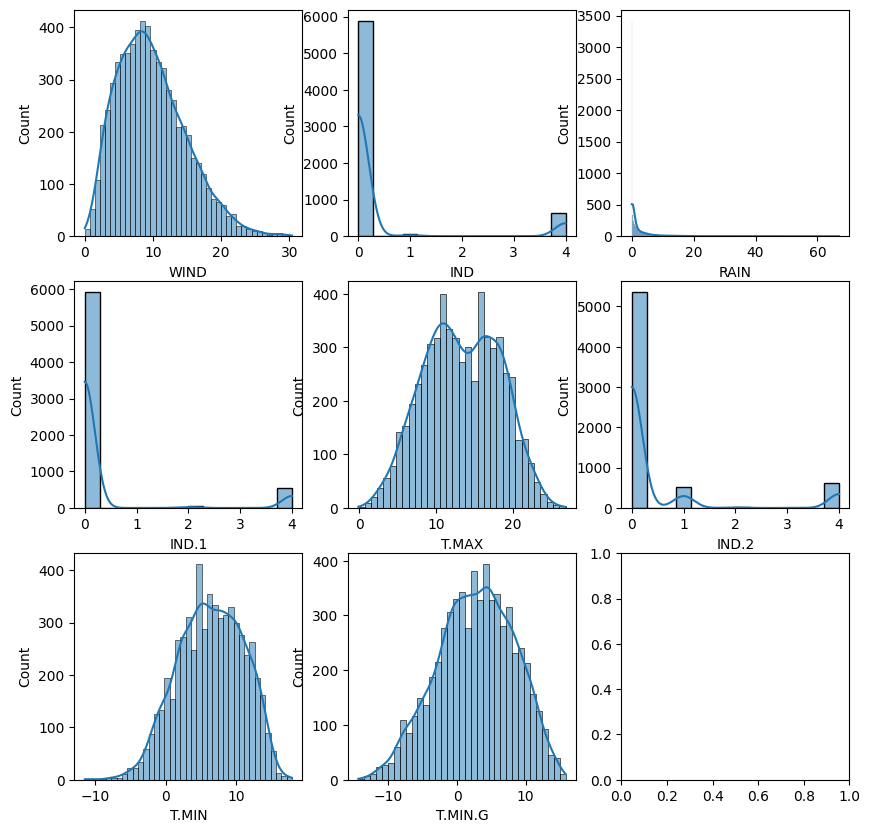

In [11]:
# select the columns to be plotted
cols = df.drop(columns=['DATE'])

# create the figure and axes
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)  # ( x , y )
axes = axes.ravel()  # flattening the array makes indexing easier
for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, ax = ax)

plt.show()

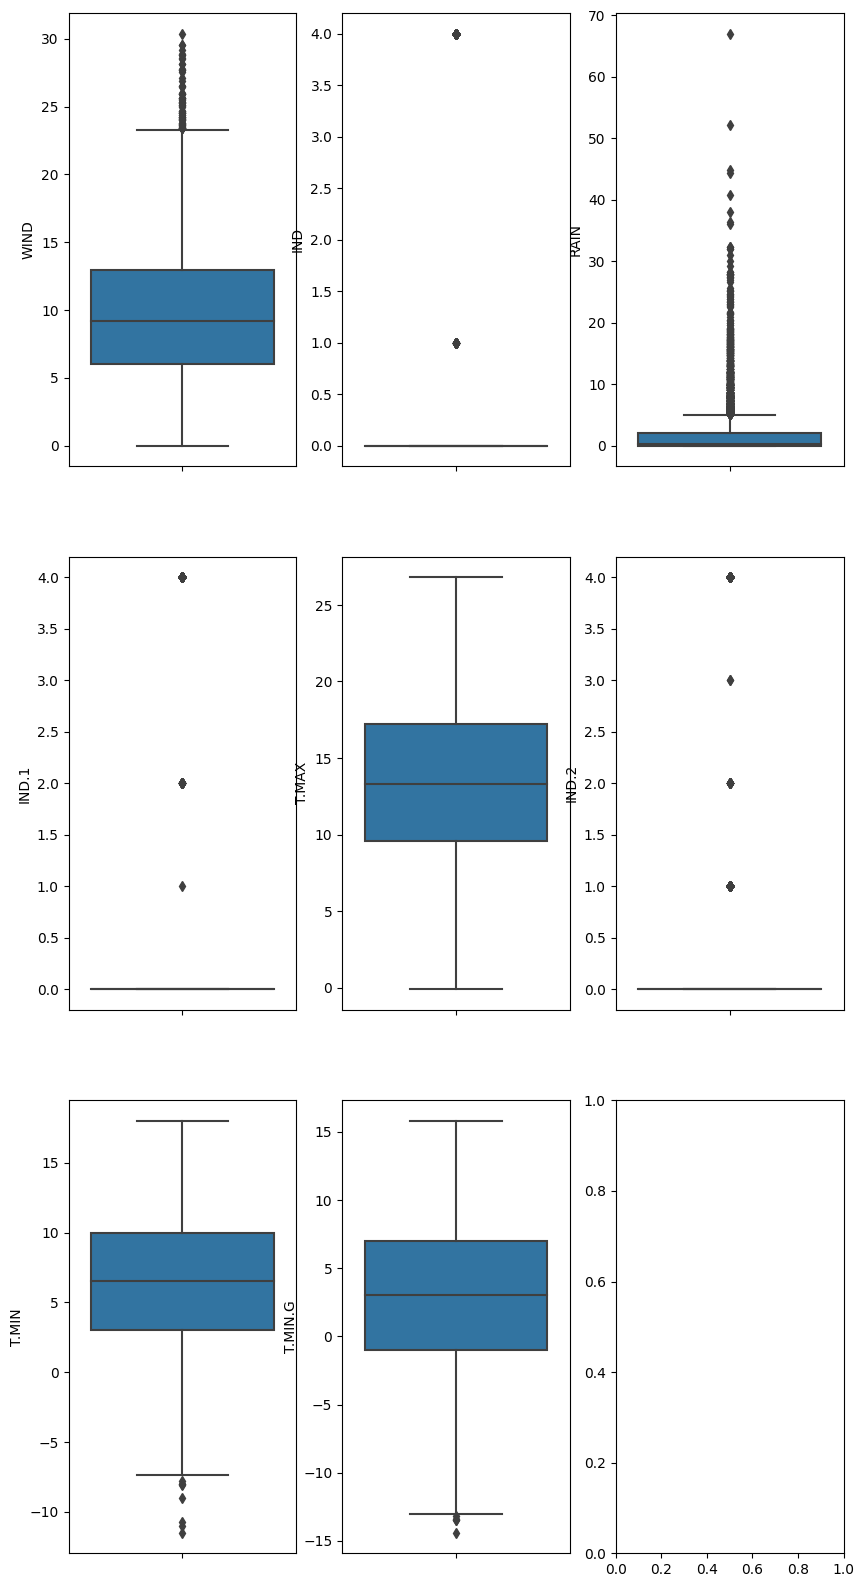

In [12]:
# create the figure and axes
fig, axes = plt.subplots(3, 3)
axes = axes.ravel()  # flattening the array makes indexing easier
fig.set_size_inches(10, 20)  # ( x , y )
for col, ax in zip(cols, axes):
    sns.boxplot(ax =ax,y=df[col])
plt.show()

**Column Names**

In [13]:
# Remove '.' in Column Names                             
df = df.rename(columns={'T.MIN':'T_MIN'})
df = df.rename(columns={'T.MAX':'T_MAX'})
df = df.rename(columns={'T.MIN.G':'T_MIN_G'})
df = df.rename(columns={'IND.1':'IND_1'})
df = df.rename(columns={'IND.2':'IND_2'})

**Value counts see if numerical is categorical**

In [14]:
df['IND'].value_counts()

IND
0    5893
4     631
1      50
Name: count, dtype: int64

In [15]:
# Run Col Rename first
df['IND_1'].value_counts()

IND_1
0.0    5912
4.0     560
2.0      40
1.0       1
Name: count, dtype: int64

In [16]:
df['IND_2'].value_counts()

IND_2
0.0    5352
4.0     613
1.0     525
2.0      21
3.0       2
Name: count, dtype: int64

## Data Transformation

**Missing Values**

In [17]:
print(df.isnull().sum().sort_values(ascending=False))

T_MIN      674
T_MAX      621
T_MIN_G    360
IND_1       61
IND_2       61
DATE         0
WIND         0
IND          0
RAIN         0
dtype: int64


In [18]:
# Print Rows with Missing Values
df[df.isnull().any(axis=1)]

,DATE,WIND,IND,RAIN,IND_1,T_MAX,IND_2,T_MIN,T_MIN_G
11,1961-01-12,15.54,0,6.0,0.0,12.2,1.0,-3.3,NaN
70,1961-03-12,17.12,0,0.1,0.0,13.4,0.0,4.8,NaN
109,1961-04-20,12.25,0,1.0,0.0,12.4,0.0,7.5,NaN
119,1961-04-30,5.09,0,1.6,0.0,16.5,0.0,9.0,NaN
120,1961-05-01,9.96,0,7.3,0.0,19.2,0.0,8.2,NaN
...,...,...,...,...,...,...,...,...,...
6359,1978-05-31,4.83,0,0.0,0.0,22.5,0.0,12.5,NaN
6477,1978-09-26,16.58,0,4.1,0.0,15.2,0.0,10.2,NaN
6555,1978-12-13,13.00,0,13.2,4.0,NaN,4.0,NaN,NaN
6556,1978-12-14,8.83,0,6.4,4.0,NaN,4.0,NaN,NaN


In [19]:
df_missing = df[['T_MIN','T_MAX','T_MIN_G','IND_1','IND_2']]

In [20]:
imputer = SimpleImputer(strategy='most_frequent')

# df_imputed = pd.DataFrame(imputer.fit_transform(df_missing),columns=df.columns)
df_imputed = imputer.fit_transform(df_missing)

In [21]:
df_imputed = pd.DataFrame(df_imputed, columns=['T_MIN','T_MAX','T_MIN_G','IND_1','IND_2'])
df_imputed = pd.concat([df[['DATE','WIND','IND','RAIN']],df_imputed], axis=1)
df_imputed

,DATE,WIND,IND,RAIN,T_MIN,T_MAX,T_MIN_G,IND_1,IND_2
0,1961-01-01,13.67,0,0.2,3.7,9.5,-1.0,0.0,0.0
1,1961-01-02,11.50,0,5.1,4.2,7.2,1.1,0.0,0.0
2,1961-01-03,11.25,0,0.4,0.5,5.5,-0.5,0.0,0.0
3,1961-01-04,8.63,0,0.2,0.4,5.6,-3.2,0.0,0.0
4,1961-01-05,11.92,0,10.4,-1.5,7.2,-7.5,0.0,1.0
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,4.0,9.8,0.0,0.0,0.0
6570,1978-12-28,14.33,0,16.0,8.5,9.1,8.0,0.0,0.0
6571,1978-12-29,19.17,0,14.7,3.5,5.0,3.2,0.0,0.0
6572,1978-12-30,18.08,0,4.9,0.3,2.9,-0.5,0.0,0.0


In [22]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   T_MIN    6574 non-null   float64       
 5   T_MAX    6574 non-null   float64       
 6   T_MIN_G  6574 non-null   float64       
 7   IND_1    6574 non-null   float64       
 8   IND_2    6574 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


In [23]:
# Check the diff of imputed vs orig, make sure mean/std didn't change too much
df.describe().round(2).T
1 - df.iloc[:,1:].describe().round(2).T / df_imputed.iloc[:,1:].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
IND,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.0
IND_1,0.009279,-0.028571,-0.008929,NaN,NaN,NaN,NaN,0.0
IND_2,0.009279,0.000000,-0.008547,NaN,NaN,NaN,NaN,0.0
RAIN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.0
T_MAX,0.094463,-0.024578,-0.027311,0.0,0.040000,-0.072581,-0.023810,0.0
T_MIN,0.102525,0.040419,-0.040359,0.0,0.142857,0.109589,-0.041667,0.0
T_MIN_G,0.054761,0.041958,-0.023897,0.0,-0.111111,0.117647,-0.060606,0.0
WIND,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.0


**Outliers**

In [24]:
# Remove values outside +/- IQR and replace with Column Mean         
df_outliers = df_imputed.copy()
df_outliers.drop(['DATE','IND','IND_1','IND_2'],axis=1, inplace=True)
# Exclude Quality, as it's changing categorical to continuous
columns_to_iterate = [col for col in df_outliers.columns] 

for col in columns_to_iterate:
    # Calculate IQR
    q75, q25 = np.percentile(df_outliers[col], [75 ,25])
    IQR = q75 - q25

    # Calculate lower and upper bounds
    lower_bound = q25 - (IQR * 2.5)
    upper_bound = q75 + (IQR * 2.5)
    
    # Replace values in column 'i' that are </> min/max with mean
    df_outliers[col] = np.where(df_outliers[col] > upper_bound, 
                              df_outliers[col].mean(), 
                              df_outliers[col])
    
    df_outliers[col] = np.where(df_outliers[col] < lower_bound, 
                              df_outliers[col].mean(), 
                              df_outliers[col])

In [25]:
# Add Dropped columns back in
df_outliers = pd.concat([df_outliers,df_imputed[['DATE','IND','IND_1','IND_2']]], axis=1)
df_outliers

,WIND,RAIN,T_MIN,T_MAX,T_MIN_G,DATE,IND,IND_1,IND_2
0,13.67,0.200000,3.7,9.5,-1.0,1961-01-01,0,0.0,0.0
1,11.50,5.100000,4.2,7.2,1.1,1961-01-02,0,0.0,0.0
2,11.25,0.400000,0.5,5.5,-0.5,1961-01-03,0,0.0,0.0
3,8.63,0.200000,0.4,5.6,-3.2,1961-01-04,0,0.0,0.0
4,11.92,1.885169,-1.5,7.2,-7.5,1961-01-05,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
6569,14.46,1.885169,4.0,9.8,0.0,1978-12-27,0,0.0,0.0
6570,14.33,1.885169,8.5,9.1,8.0,1978-12-28,0,0.0,0.0
6571,19.17,1.885169,3.5,5.0,3.2,1978-12-29,0,0.0,0.0
6572,18.08,4.900000,0.3,2.9,-0.5,1978-12-30,0,0.0,0.0


In [26]:
# Quick View of Outlier transformation made
df_outliers.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
WIND,6574.0,9.79,0.0,6.0,9.21,12.96,29.58,4.97
RAIN,6574.0,1.04,0.0,0.0,0.2,1.89,7.0,1.54
T_MIN,6574.0,6.68,-11.5,3.5,7.3,9.6,18.0,4.46
T_MAX,6574.0,13.02,-0.1,10.0,12.4,16.8,26.8,4.76
T_MIN_G,6574.0,2.86,-14.4,-0.9,3.4,6.6,15.8,5.44
DATE,6574,1969-12-31 12:00:00,1961-01-01 00:00:00,1965-07-02 06:00:00,1969-12-31 12:00:00,1974-07-01 18:00:00,1978-12-31 00:00:00,NaN
IND,6574.0,0.39,0.0,0.0,0.0,0.0,4.0,1.18
IND_1,6574.0,0.35,0.0,0.0,0.0,0.0,4.0,1.12
IND_2,6574.0,0.46,0.0,0.0,0.0,0.0,4.0,1.17


**Scale/Normalize**

In [27]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Move df_outliers to df
df_before_outlier = df.copy()
df = df_outliers.copy()

# Separate features and target variable
y = df['WIND'].copy()
X = df.drop(['WIND','DATE'], axis=1) # all features

# Pipeline to scale
pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

# Run the transformation pipeline
X = pipeline.fit_transform(X)

**Test/Train Split**

In [28]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=6047)

## Modeling

**Linear Regression**

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

MSE: 20.24079319532924
MAE: 3.616215010052192
R^2: 0.11222406622317116
Explained Variance Score: 0.11285804784137987


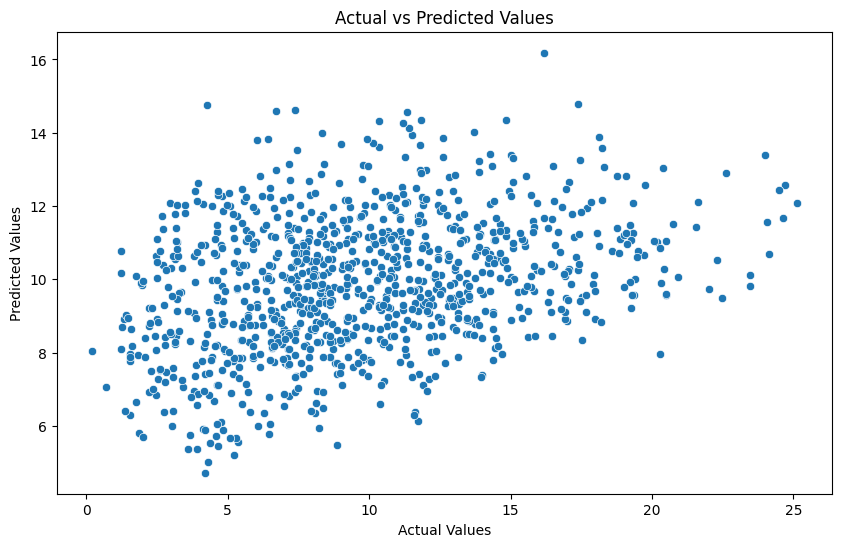

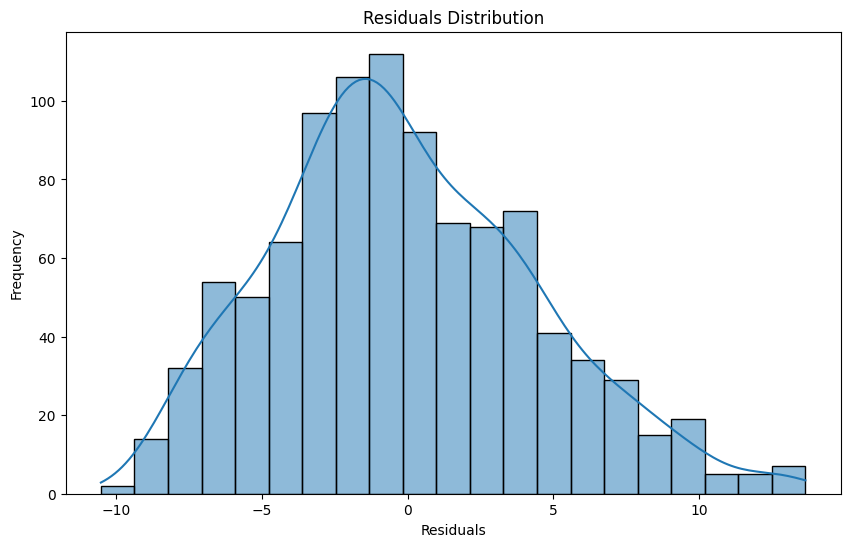

In [32]:
# Metrics
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("Explained Variance Score:", evs)

# Visualizations
# actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.show()

**Decision Tree**

In [34]:
dt = DecisionTreeRegressor(random_state=6047)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

MSE: 39.84126380748771
MAE: 5.030009287402905
R^2: -0.7474668526183734
Explained Variance Score: -0.744321552629033


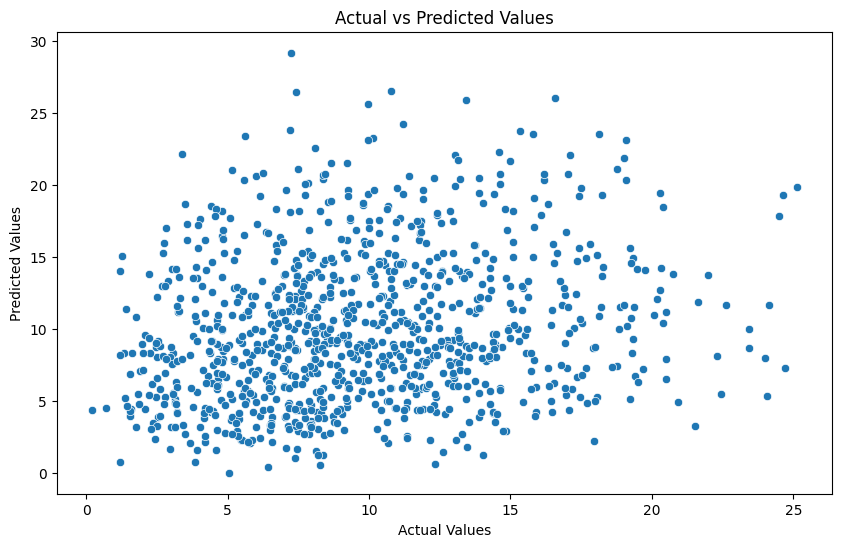

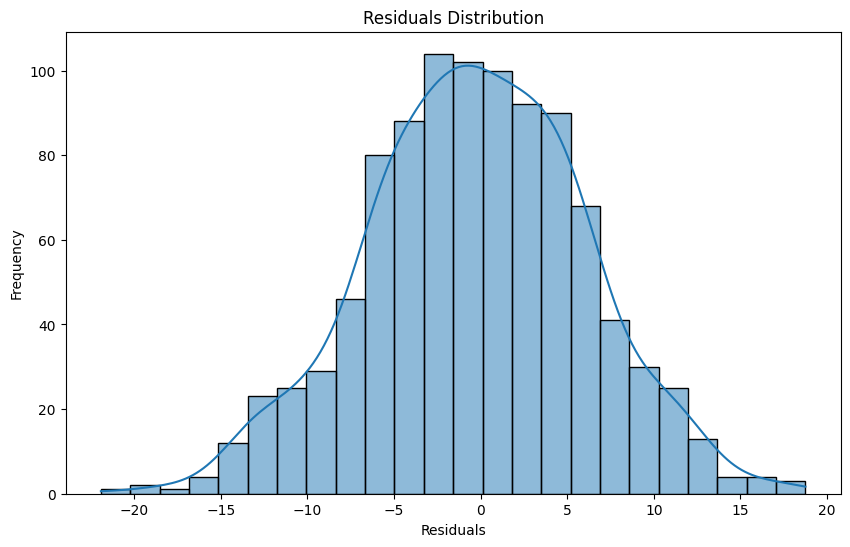

In [35]:
# Metrics
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("Explained Variance Score:", evs)

# Visualizations
# actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.show()

**Random Forest**

In [36]:
rf = RandomForestRegressor(random_state=6047)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

MSE: 21.11857279669926
MAE: 3.6242888956432444
R^2: 0.07372401349616886
Explained Variance Score: 0.07524957166956303


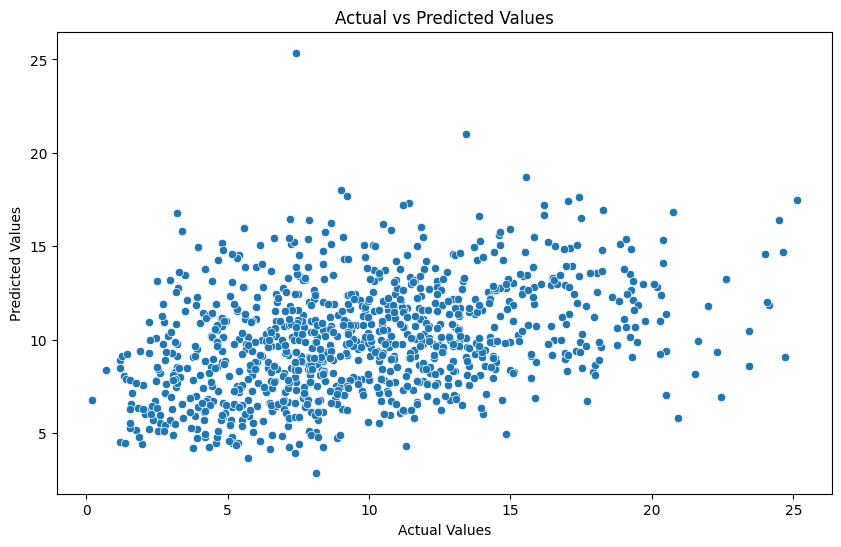

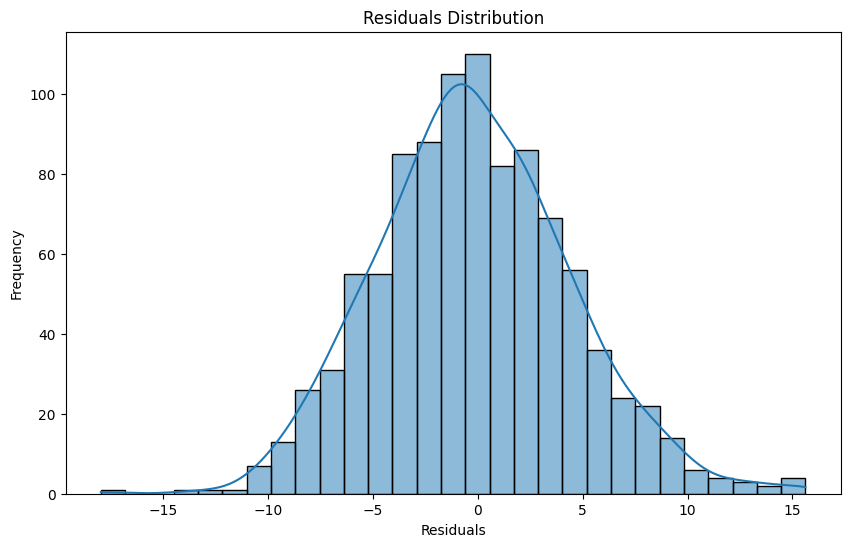

In [37]:
# Metrics
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("Explained Variance Score:", evs)

# Visualizations
# actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.show()

**Gradient Boosting**

In [38]:
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=6047)
gb.fit(X_train, y_train)
y_pred = rf.predict(X_test)

MSE: 21.11857279669926
MAE: 3.6242888956432444
R^2: 0.07372401349616886
Explained Variance Score: 0.07524957166956303


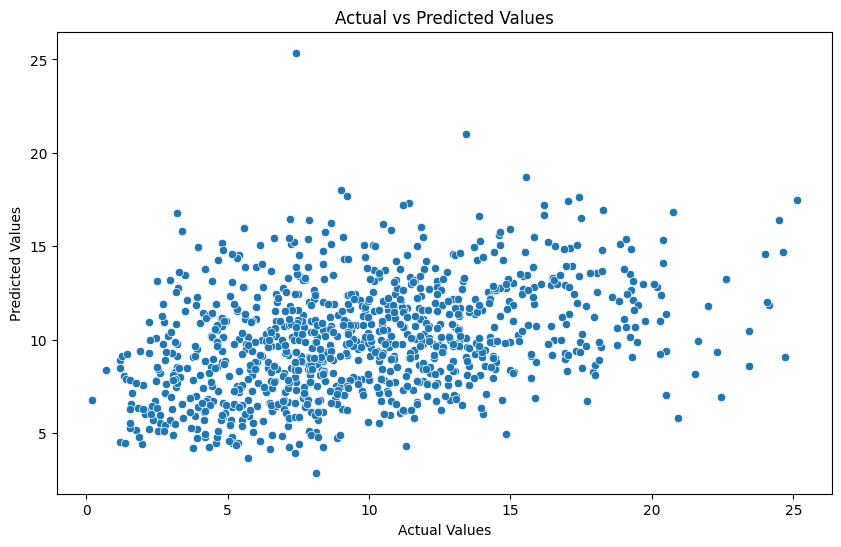

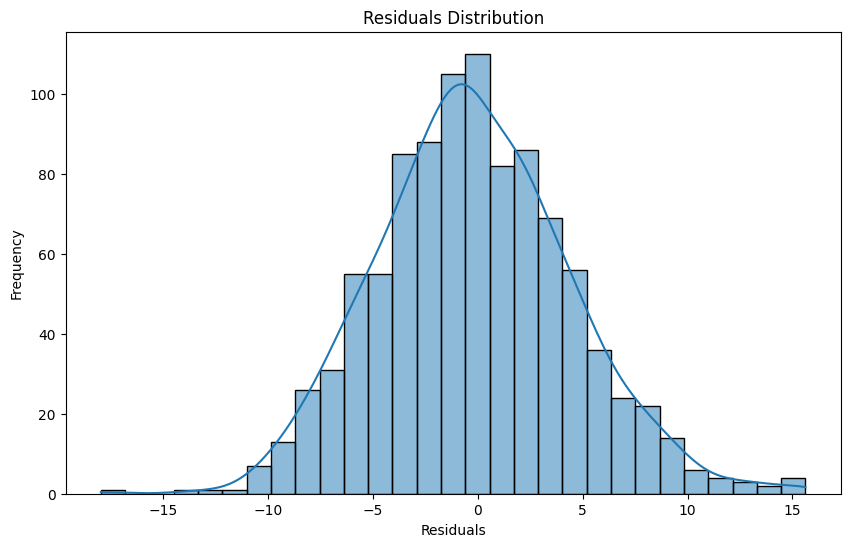

In [39]:
# Metrics
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("Explained Variance Score:", evs)

# Visualizations
# actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.show()

**SVM**

In [40]:
svm = SVR(kernel='rbf',degree=2,C=10,epsilon=1)  #rbf 18.75 .176
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

MSE: 18.99215331978345
MAE: 3.436227755041031
R^2: 0.16699032072546238
Explained Variance Score: 0.1686943894230477


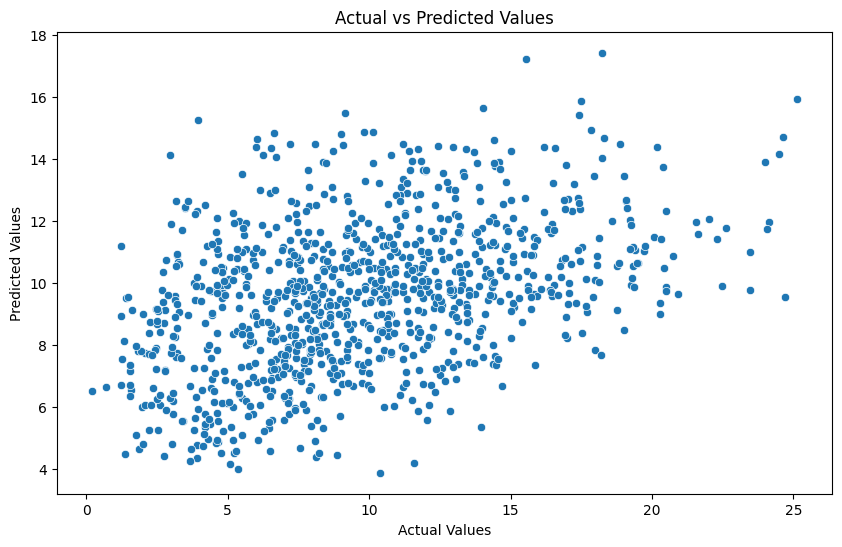

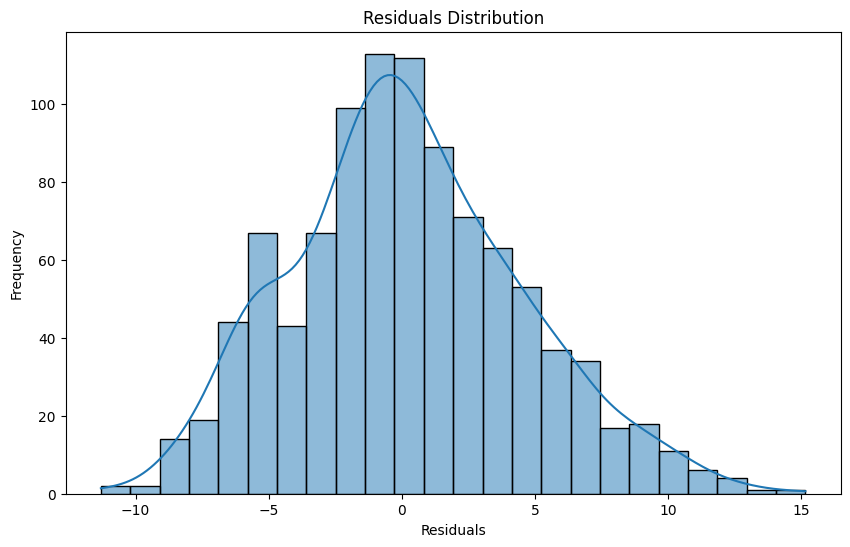

In [41]:
# Metrics
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("Explained Variance Score:", evs)

# Visualizations
# actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.show()

In [42]:
with open(r'data\wind.pkl','wb') as file:
    pickle.dump(dt,file)

**Ridge Regression**

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [ ]:
# Metrics
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("Explained Variance Score:", evs)

# Visualizations
# actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.show()

**Lasso Regression**

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [ ]:
# Metrics
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("Explained Variance Score:", evs)

# Visualizations
# actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.show()

**Elastic Net**

In [ ]:
en = ElasticNet()
en.fit(X_train, y_train)
y_pred = en.predict(X_test)

In [ ]:
# Metrics
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("Explained Variance Score:", evs)

# Visualizations
# actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.show()

**Ada Booster**

In [ ]:
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)

In [ ]:
# Metrics
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("Explained Variance Score:", evs)

# Visualizations
# actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.show()

**KNN Regressor**

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
# Metrics
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("Explained Variance Score:", evs)

# Visualizations
# actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.show()

**Neural Net**

In [ ]:
# Prep New DF
df_nn = df_outliers.copy()

# Separate features and target variable
y = df_nn['WIND'].copy()
X = df_nn.drop(['WIND','DATE'], axis=1)

In [ ]:
X

In [ ]:
# Scale Data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=6047)


In [ ]:
y_pred = ann.predict(X_test)

In [ ]:
# Metrics
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("Explained Variance Score:", evs)

# Visualizations
# actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.show()